## **DAA - Dados e Aprendizagem Automática**
### MCI to AD Progression Prediction Using Brain MRI Analysis
#### Group 2

In [4]:
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedShuffleSplit
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, BaggingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from main import preprocess
from models import *
import shap

pd.set_option('display.max_info_columns', 3000)
pd.set_option('display.max_columns', 3000)
pd.set_option('display.max_rows', 3000)

/home/diogo/Uni/MEI/1ano/DAA/Projeto/repo/DAA/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### **Data Analysis / Preprocessing**

**Import datasets**

In [5]:
df_train = pd.read_csv('datasets/train_radiomics_hipocamp.csv')
df_test = pd.read_csv('datasets/test_radiomics_hipocamp.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 2181 columns):
 #     Column                                                         Non-Null Count  Dtype  
---    ------                                                         --------------  -----  
 0     ID                                                             305 non-null    object 
 1     Image                                                          305 non-null    object 
 2     Mask                                                           305 non-null    object 
 3     diagnostics_Versions_PyRadiomics                               305 non-null    object 
 4     diagnostics_Versions_Numpy                                     305 non-null    object 
 5     diagnostics_Versions_SimpleITK                                 305 non-null    object 
 6     diagnostics_Versions_PyWavelet                                 305 non-null    object 
 7     diagnostics_Versions_Python             

In [4]:
df_train.head()

ID                                              Image  \
0  006_S_0681  /notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...   
1  941_S_1203  /notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...   
2  011_S_0003  /notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...   
3  057_S_0779  /notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...   
4  033_S_0920  /notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...   

                                                Mask  \
0  /notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...   
1  /notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...   
2  /notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...   
3  /notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...   
4  /notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...   

  diagnostics_Versions_PyRadiomics diagnostics_Versions_Numpy  \
0                            2.2.0                     1.18.5   
1                            2.2.0                     1.18.5   
2                            2.2.0                     1.18.5   
3                            2.2.0                     1.18.5   
4                            2.2.0                     1.18.5   

  diagnostics_Versions_SimpleITK diagnostics_Versions_PyWavelet  \
0                          1.2.4                          1.1.1   
1                          1.2.4                          1.1.1   
2                          1.2.4                          1.1.1   
3                          1.2.4                          1.1.1   
4                          1.2.4                          1.1.1   

  diagnostics_Versions_Python  \
0                       3.7.7   
1                       3.7.7   
2                       3.7.7   
3                       3.7.7   
4                       3.7.7   

                  diagnostics_Configuration_Settings  \
0  {'minimumROIDimensions': 2, 'minimumROISize': ...   
1  {'minimumROIDimensions': 2, 'minimumROISize': ...   
2  {'minimumROIDimensions': 2, 'minimumROISize': ...   
3  {'minimumROIDimensions': 2, 'minimumROISize': ...   
4  {'minimumROIDimensions': 2, 'minimumROISize': ...   

         diagnostics_Configuration_EnabledImageTypes  \
0  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   
1  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   
2  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   
3  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   
4  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   

            diagnostics_Image-original_Hash  \
0  b5d774a32163a7ee822d42a07808a787f8687f56   
1  397042d736bd790b7880b372b1749ff424f89cbe   
2  84d679a88812c4aaf03a6d99f00c913b2f64506f   
3  168f330d2ca3f097146e5d041f33b40672d230df   
4  ea5f291ea107dfda5e5c725eae7c0555ced44ce4   

   diagnostics_Image-original_Dimensionality  \
0                                          3   
1                                          3   
2                                          3   
3                                          3   
4                                          3   

  diagnostics_Image-original_Spacing diagnostics_Image-original_Size  \
0                    (1.0, 1.0, 1.0)                 (256, 256, 256)   
1                    (1.0, 1.0, 1.0)                 (256, 256, 256)   
2                    (1.0, 1.0, 1.0)                 (256, 256, 256)   
3                    (1.0, 1.0, 1.0)                 (256, 256, 256)   
4                    (1.0, 1.0, 1.0)                 (256, 256, 256)   

   diagnostics_Image-original_Mean  diagnostics_Image-original_Minimum  \
0                         5.848123                                   0   
1                         5.238834                                   0   
2                         6.816667                                   0   
3                         6.445162                                   0   
4                         5.568269                                   0   

   diagnostics_Image-original_Maximum  \
0                                 178   
1                                 190   
2                        

In [6]:
X_train, X_test, y_train, y_test, le = preprocess(df_train)
df_test = preprocess(df_test, test=True)

In [7]:
X_train.head()

diagnostics_Image-original_Mean  diagnostics_Image-original_Maximum  \
0                        -0.962052                           -0.069980   
1                         1.046069                           -0.349902   
2                         0.420493                           -0.869756   
3                        -0.958787                            0.129963   
4                         0.862552                           -0.109969   

   diagnostics_Mask-original_VoxelNum  original_shape_Elongation  \
0                            1.675565                  -0.133523   
1                           -0.537581                  -2.773948   
2                            0.463186                   0.338363   
3                           -0.288082                  -0.634513   
4                            0.022405                  -0.196597   

   original_shape_Flatness  original_shape_LeastAxisLength  \
0                 0.634802                        0.883845   
1                -1.417033                       -0.425353   
2                 1.191925                        0.068570   
3                -0.634404                       -0.813342   
4                 0.049702                       -0.680674   

   original_shape_MajorAxisLength  original_shape_Maximum2DDiameterColumn  \
0                        0.213803                                0.669393   
1                        1.890831                                1.871118   
2                       -1.694794                               -0.874244   
3                       -0.222244                                1.170142   
4                       -1.123068                               -0.378516   

   original_shape_Maximum2DDiameterRow  original_shape_Maximum2DDiameterSlice  \
0                             0.345758                               0.539664   
1                             1.830667                              -1.739045   
2                            -0.894669                               0.078121   
3                             0.837082                              -0.928127   
4                            -0.671555                              -1.277310   

   original_shape_Maximum3DDiameter  original_shape_MeshVolume  \
0                          0.755114                   1.655012   
1                          1.570218                  -0.533707   
2                         -0.923966                   0.447447   
3                          0.883149                  -0.272425   
4                         -0.412403                   0.031121   

   original_shape_MinorAxisLength  original_shape_Sphericity  \
0                        0.086245                   1.268353   
1                       -1.767631                   0.133036   
2                       -1.235053                   0.990276   
3                       -0.914280                  -0.171705   
4                       -1.260961                   0.879715   

   original_shape_SurfaceArea  original_shape_SurfaceVolumeRatio  \
0                    1.117637                          -1.431036   
1                   -0.657576                           0.132345   
2                    0.012557                          -0.806015   
3                   -0.190075                           0.135784   
4                   -0.385499                          -0.550186   

   original_shape_VoxelVolume  original_firstorder_10Percentile  \
0                    1.675565                          0.389513   
1                   -0.537581                         -0.233844   
2                    0.463186                          1.428443   
3                   -0.288082                          0.389513   
4                    0.022405                         -0.026058   

   original_firstorder_90Percentile  original_firstorder_Energy  \
0                         -1.674492                    1.079056   
1                          1.173389                   -0.288000   
2                          1.17

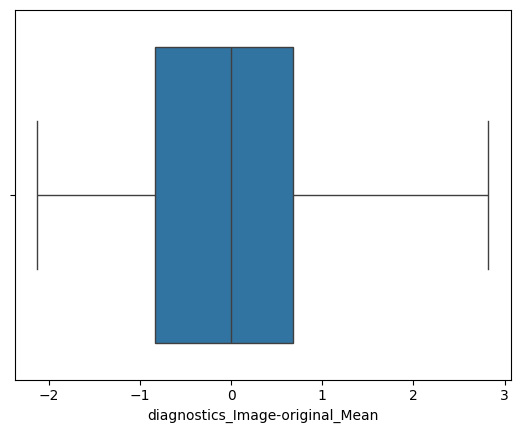

In [10]:
sns.boxplot(x=X_train['diagnostics_Image-original_Mean'])
plt.show()

### **Models**

In [7]:
dt_model, dt_score, dt_f1 = decision_tree(X_train, y_train, X_test, y_test)
rf_model, rf_score, rf_f1 = random_forest(X_train, y_train, X_test, y_test)
xgb_model, xgb_score, xgb_f1 = xgboost(X_train, y_train, X_test, y_test)
svm_model, svm_score, svm_f1 = svm(X_train, y_train, X_test, y_test)

# gbc_model, gbc_score, gbc_f1 = gradient_boosting(X_train, y_train, X_test, y_test)
# bst_bg_model, bg_score, bg_f1 = bagging(X_train, y_train, X_test, y_test, dt_model)

Fitting Decision Tree model...
Decision Tree Accuracy: 34.43%
Decision Tree F1 Score: 0.32
Fitting Random Forest model...
Random Forest Accuracy: 45.90%
Random Forest F1 Score: 0.43
Fitting XGBoost model...
XGBoost Accuracy: 40.98%
XGBoost F1 Score: 0.41
Fitting SVM model...
SVM Accuracy: 39.34%
SVM F1 Score: 0.33


#### Feature Importance

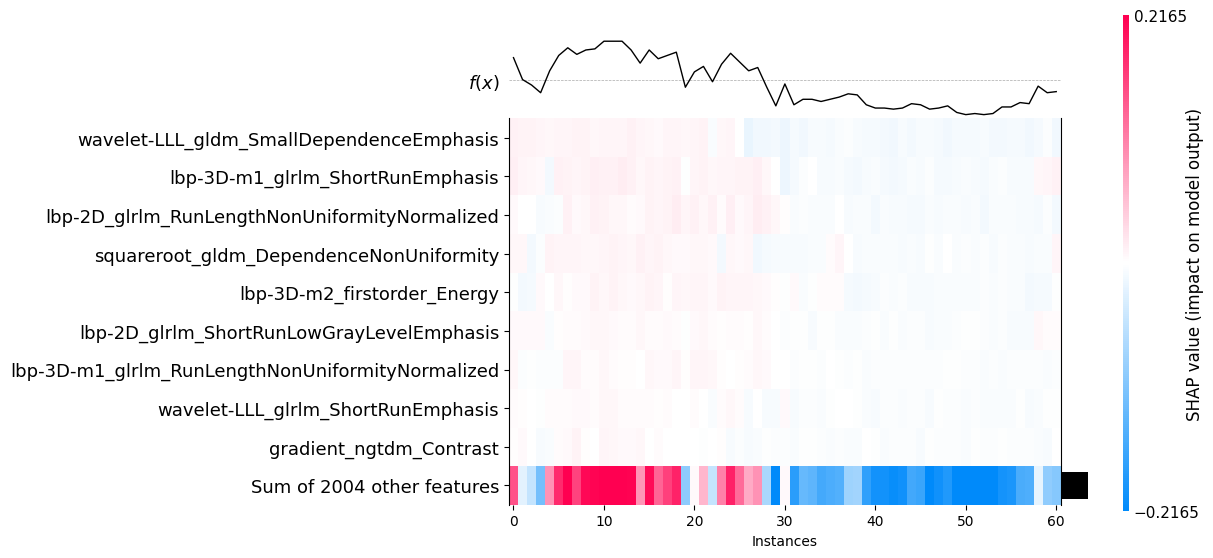

<Axes: xlabel='Instances'>

In [23]:
shap.initjs()
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer(X_test)

shap.plots.heatmap(shap_values[:,:,1])

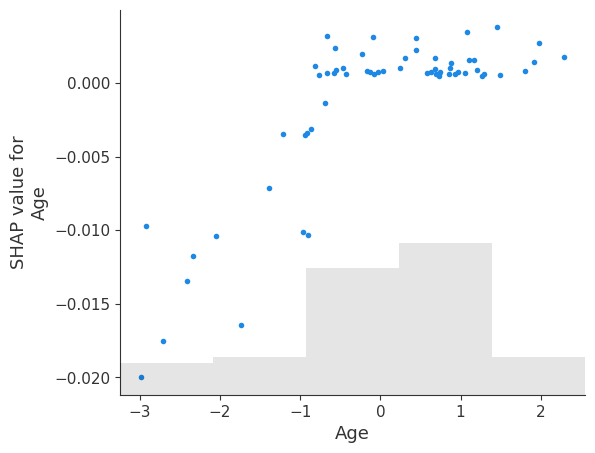

In [21]:
shap.plots.scatter(shap_values[:,'Age',1])